## **공공조달 데이터분석**


*   ESG 평가항목 가이드라인 제시
*   공공데이터 활용



### **데이터 불러오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings(action='ignore')

def show_hist(df, columns):
    for column in columns:
        print('column name:', column)
        fig, axs = plt.subplots(figsize=(12,4), nrows=1, ncols=2 ,squeeze=False)
        sns.boxplot(df[column], ax=axs[0][0])
        sns.distplot(df[column], ax=axs[0][1])

def cut_outlier(df, columns):
    df=df.copy()
    for column in columns:
        q1=df[column].quantile(.25)
        q3=df[column].quantile(.75)
        iqr=q3-q1
        low=q1-1.5*iqr
        high=q3+1.5*iqr
        df.loc[df[column]<low, column]=low
        df.loc[df[column]>high, column]=high
    return df

def corr(df, types):
    col_len = len(df.columns)
    p_df = pd.DataFrame(np.zeros((col_len,col_len)),columns=df.columns, index=df.columns)
    for idx in range(len(p_df.index)):
      for col in range(len(p_df.columns)):
            p_df.iloc[idx,col] = round(stats.pearsonr(df[df.columns[idx]], df[df.columns[col]])[types],2)
    return p_df

def show_heatmap(df1, df2, figx, figy):
    mask1 = np.zeros_like(df1)
    mask2 = np.zeros_like(df2)
    mask1[np.triu_indices_from(mask1)] = True
    mask2[np.triu_indices_from(mask2)] = True
    fig, axs = plt.subplots(figsize=(figx,figy), nrows=1,ncols=2, squeeze=False)
    sns.heatmap(df1, annot=True,mask=mask1, cmap='coolwarm', ax=axs[0][0])
    sns.heatmap(df2, annot=True, mask=mask2, cmap='coolwarm', ax=axs[0][1])

def show_qqplot(columns):
    plt.figure(figsize=(25,20))
    plt.suptitle("Q-Q plot", fontsize=30)

    for i in range(len(columns)):
        plt.subplot(3,3,i+1) 
        stats.probplot(data[columns[i]], plot=plt)
        plt.title(columns[i])
    plt.show()

def calculate_weight(weight):
  sum = weight.sum()
  for i in range(len(weight)):
    weight[i] = weight[i] / sum
  return weight

In [ ]:
# 데이터프레임 불러오기
data = pd.read_excel('/content/drive/MyDrive/Contest/공공조달/dataset/data4.xlsx', index_col = 0)
data.head(10)

,녹색제품실적(건수),온실가스 배출량,용수사용량(ton),에너지사용량(TOE),폐기물발생량(ton),녹색제품 구매액(백만),에너지비용(백만),에너지이용합리화법관련제품(건수),온실가스 감축률,여성임원수,장애인생산품구매비중,중소기업제품사용(건수),중소기업구매액,장애인채용현황(명),환경 유관부서 수,기부실적(백만원),총 직원수,여성직원수,감사임원수,여성직원비율,구매실적(백만)
공공기관,,,,,,,,,,,,,,,,,,,,,
가축위생방역지원본부,19.0,20.74,9.3200,0.8020,0.0495,15.875249,10.537249,9.0,3.27,2,0.0,16.0,12.278300,0.0,1.0,46.65,1275.0,436.43,1.0,0.34,10391.88
건강보험심사평가원,89.0,89.87,658.2900,41.0757,1.8640,1383.847621,886.804839,14.0,36.38,4,0.0,40.0,3118.967189,0.0,3.0,595.59,3971.0,2823.75,1.0,0.71,76878.46
건설근로자공제회,96.0,0.54,12.2625,0.6485,0.1388,86.511050,40.397850,38.0,15.63,4,0.0,46.0,143.922550,0.0,2.0,21.18,218.5,83.50,1.0,0.38,1547.88
게임물관리위원회,11.0,0.11,0.0000,0.0000,0.0000,23.445500,20.745500,8.0,56.00,3,11.0,9.0,15.315500,0.0,NaN,1.77,99.0,30.00,1.0,0.30,4321.18
경제인문사회연구회,34.0,0.18,0.0000,0.0000,0.0000,35.804800,14.348000,21.0,50.00,3,0.0,22.0,31.516000,0.0,NaN,0.00,98.0,39.00,16.0,0.40,3825.08
고용노동부,438.0,123.97,262.8900,9.7110,1.2340,6626.956627,6232.170737,259.0,10.34,5,2.0,209.0,6195.846501,4.0,3.0,NaN,NaN,NaN,NaN,NaN,196782.57
공무원연금공단,145.0,9.38,75.1300,3.2226,0.2951,745.579989,476.228289,69.0,30.52,2,0.0,75.0,577.202809,1.0,5.0,37.27,683.0,323.56,1.0,0.47,65349.03
과학기술정책연구원,4.0,0.03,20.5400,1.9521,0.0251,1.666000,NaN,NaN,76.92,2,0.0,NaN,NaN,0.0,1.0,0.00,167.0,79.00,1.0,0.47,992.77
관세청,690.0,98.25,52.8522,2.5736,0.2674,2841.449516,1222.634757,86.0,19.43,0,0.0,509.0,4786.200350,1.0,1.0,NaN,NaN,NaN,NaN,NaN,92803.41


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 가축위생방역지원본부 to 환경부
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   녹색제품실적(건수)         146 non-null    float64
 1   온실가스 배출량           149 non-null    float64
 2   용수사용량(ton)         149 non-null    float64
 3   에너지사용량(TOE)        149 non-null    float64
 4   폐기물발생량(ton)        149 non-null    float64
 5   녹색제품 구매액(백만)       140 non-null    float64
 6   에너지비용(백만)          137 non-null    float64
 7   에너지이용합리화법관련제품(건수)  142 non-null    float64
 8   온실가스 감축률           136 non-null    float64
 9   여성임원수              149 non-null    int64  
 10  장애인생산품구매비중         148 non-null    float64
 11  중소기업제품사용(건수)       139 non-null    float64
 12  중소기업구매액            135 non-null    float64
 13  장애인채용현황(명)         149 non-null    float64
 14  환경 유관부서 수          139 non-null    float64
 15  기부실적(백만원)          115 non-null    float64
 16  총 직원수              133

In [ ]:
data.astype('float')

,녹색제품실적(건수),온실가스 배출량,용수사용량(ton),에너지사용량(TOE),폐기물발생량(ton),녹색제품 구매액(백만),에너지비용(백만),에너지이용합리화법관련제품(건수),온실가스 감축률,여성임원수,장애인생산품구매비중,중소기업제품사용(건수),중소기업구매액,장애인채용현황(명),환경 유관부서 수,기부실적(백만원),총 직원수,여성직원수,감사임원수,여성직원비율,구매실적(백만)
공공기관,,,,,,,,,,,,,,,,,,,,,
가축위생방역지원본부,19.0,20.74,9.3200,0.8020,0.0495,15.875249,10.537249,9.0,3.27,2.0,0.0,16.0,12.278300,0.00,1.0,46.65,1275.0,436.43,1.0,0.34,10391.88
건강보험심사평가원,89.0,89.87,658.2900,41.0757,1.8640,1383.847621,886.804839,14.0,36.38,4.0,0.0,40.0,3118.967189,0.00,3.0,595.59,3971.0,2823.75,1.0,0.71,76878.46
건설근로자공제회,96.0,0.54,12.2625,0.6485,0.1388,86.511050,40.397850,38.0,15.63,4.0,0.0,46.0,143.922550,0.00,2.0,21.18,218.5,83.50,1.0,0.38,1547.88
게임물관리위원회,11.0,0.11,0.0000,0.0000,0.0000,23.445500,20.745500,8.0,56.00,3.0,11.0,9.0,15.315500,0.00,NaN,1.77,99.0,30.00,1.0,0.30,4321.18
경제인문사회연구회,34.0,0.18,0.0000,0.0000,0.0000,35.804800,14.348000,21.0,50.00,3.0,0.0,22.0,31.516000,0.00,NaN,0.00,98.0,39.00,16.0,0.40,3825.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
한전KDN(주),7.0,53.85,406.1000,13.3681,0.6750,830.624900,830.624900,7.0,30.20,1.0,0.0,7.0,830.624900,0.00,1.0,NaN,2970.0,423.50,1.0,0.14,138727.31
한전케이피에스주식회사,516.0,0.00,270.8600,20.0469,0.4763,5778.801181,4500.034533,93.0,NaN,1.0,0.0,377.0,5955.302072,0.00,5.0,NaN,6703.0,600.00,0.0,0.09,275647.22
해양수산부,951.0,186.41,190.3200,7.1106,0.8930,7191.868689,3993.573473,541.0,32.38,3.0,0.0,786.0,15167.165693,1.63,1.0,NaN,44.0,12.00,1.0,0.27,1875571.32


In [ ]:
# 결측치 확인
data.isna().sum()

녹색제품실적(건수)            3
온실가스 배출량              0
용수사용량(ton)            0
에너지사용량(TOE)           0
폐기물발생량(ton)           0
녹색제품 구매액(백만)          9
에너지비용(백만)            12
에너지이용합리화법관련제품(건수)     7
온실가스 감축률             13
여성임원수                 0
장애인생산품구매비중            1
중소기업제품사용(건수)         10
중소기업구매액              14
장애인채용현황(명)            0
환경 유관부서 수            10
기부실적(백만원)            34
총 직원수                16
여성직원수                16
감사임원수                16
여성직원비율               16
구매실적(백만)              7
dtype: int64

In [ ]:
# 결측치 평균으로 채우기
data.fillna(data.mean(),inplace=True)

In [ ]:
# 결측치 확인
data.isna().sum()

녹색제품실적(건수)           0
온실가스 배출량             0
용수사용량(ton)           0
에너지사용량(TOE)          0
폐기물발생량(ton)          0
녹색제품 구매액(백만)         0
에너지비용(백만)            0
에너지이용합리화법관련제품(건수)    0
온실가스 감축률             0
여성임원수                0
장애인생산품구매비중           0
중소기업제품사용(건수)         0
중소기업구매액              0
장애인채용현황(명)           0
환경 유관부서 수            0
기부실적(백만원)            0
총 직원수                0
여성직원수                0
감사임원수                0
여성직원비율               0
구매실적(백만)             0
dtype: int64

In [ ]:
# 컬럼명 변경
data.columns = ['Green_CNT','Gas','Water','Energy','Waste','Green_price','Energy_price','Energy_CNT','Gas_reduce','Female_exe',
                'Disabled_Product_RTO','Small_CNT','Small_price','Disabled_member','Env','Donation','Member','Female_member','Auditor','Female_RTO','Target']

### **EDA 및 전처리**

In [ ]:
data.describe()

,Green_CNT,Gas,Water,Energy,Waste,Green_price,Energy_price,Energy_CNT,Gas_reduce,Female_exe,Disabled_Product_RTO,Small_CNT,Small_price,Disabled_member,Env,Donation,Member,Female_member,Auditor,Female_RTO,Target
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02
mean,633.883562,65.768188,373.992305,87.680364,69.596640,3816.526980,1623.214520,308.366197,29.127721,2.281879,1.128378,393.230216,6420.635643,2.207248,2.431655,1165.343478,1795.863233,585.220000,1.007519,0.355414,3.600693e+05
std,2132.140368,157.195409,1192.987237,904.788823,758.512313,10878.560575,4305.305398,1332.775607,18.917737,1.568613,3.020830,1176.565968,16739.088545,5.696164,1.979798,3119.258954,3021.838507,1159.380592,1.322856,0.138610,1.076388e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.290000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,42.000000,12.000000,0.000000,0.030000,1.321500e+02
25%,34.000000,0.250000,35.210000,1.686700,0.049500,97.571900,61.285500,21.000000,17.280000,1.000000,0.000000,31.000000,143.572400,0.000000,1.000000,9.820000,218.500000,83.500000,1.000000,0.280000,6.914310e+03
50%,135.000000,15.930000,111.810000,6.666100,0.295100,567.814419,368.263100,68.000000,29.127721,2.000000,0.000000,103.000000,916.994091,0.000000,2.000000,69.380000,755.000000,235.600000,1.000000,0.355414,3.711054e+04
75%,601.000000,66.920000,270.860000,13.267800,0.910000,2841.449516,1534.760290,285.000000,37.020000,3.000000,1.000000,393.230216,6420.635643,2.000000,3.000000,1165.343478,1795.863233,585.220000,1.000000,0.420000,1.859052e+05
max,23225.000000,1539.250000,10687.740000,11053.420000,9248.330000,78462.013104,34256.382091,15508.000000,100.000000,7.000000,25.000000,13496.000000,128131.590291,42.000000,15.000000,20136.230000,23540.000000,9130.000000,16.000000,0.720000,6.864351e+06


column name: Green_CNT
column name: Gas
column name: Water
column name: Energy
column name: Waste
column name: Green_price
column name: Energy_price
column name: Energy_CNT
column name: Gas_reduce
column name: Female_exe
column name: Disabled_Product_RTO
column name: Small_CNT
column name: Small_price
column name: Disabled_member
column name: Env
column name: Donation
column name: Member
column name: Female_member
column name: Auditor
column name: Female_RTO


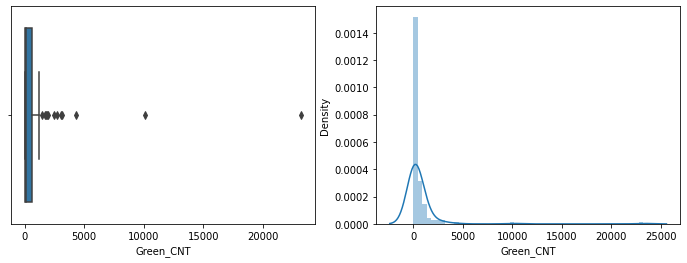

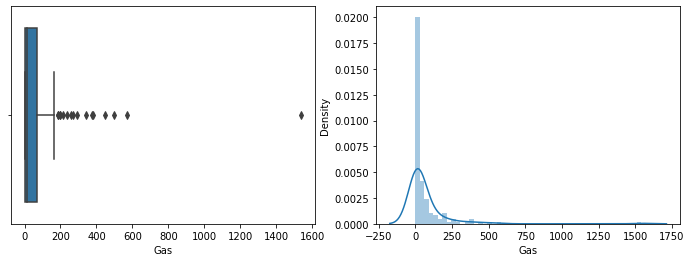

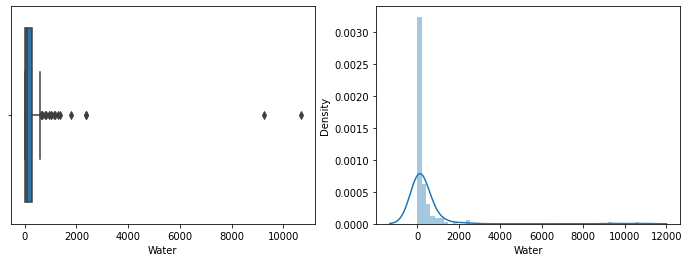

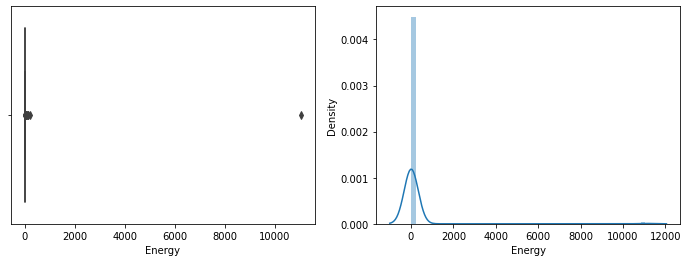

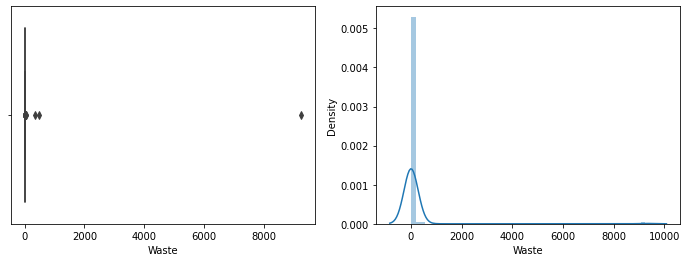

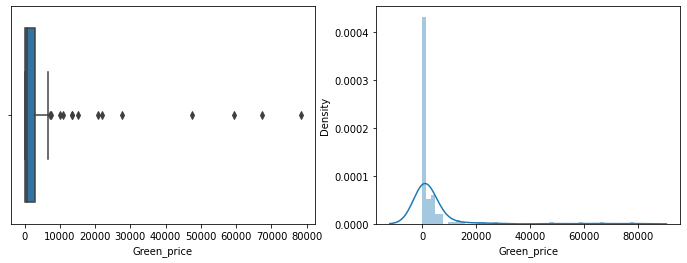

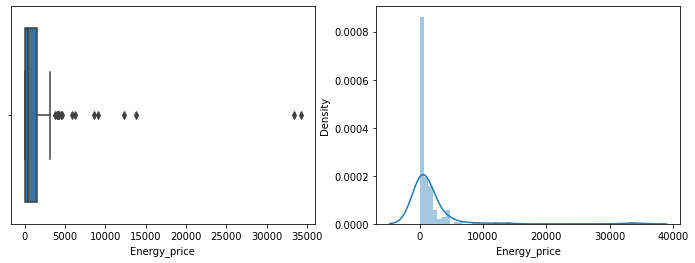

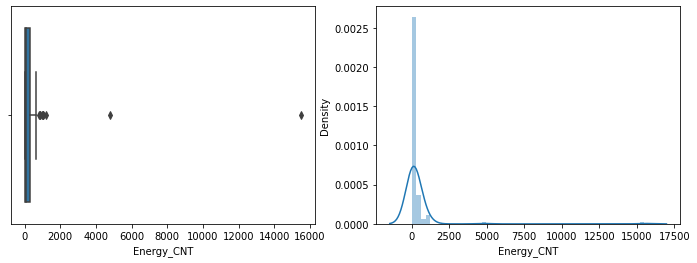

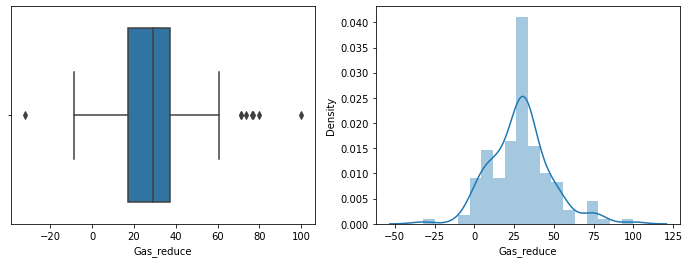

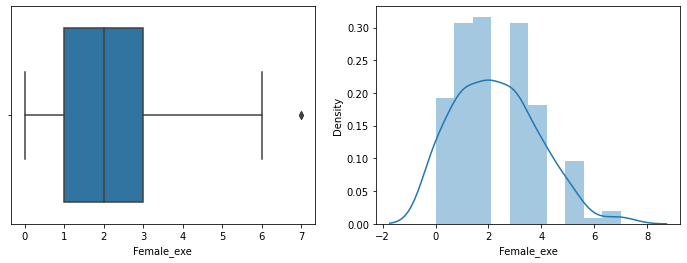

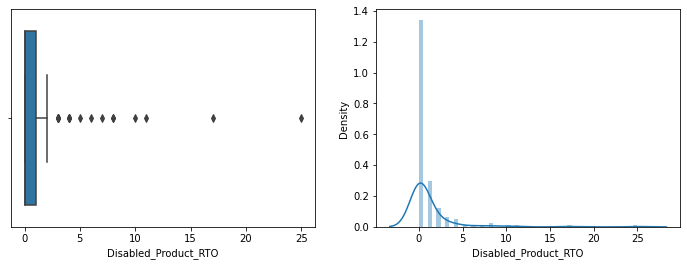

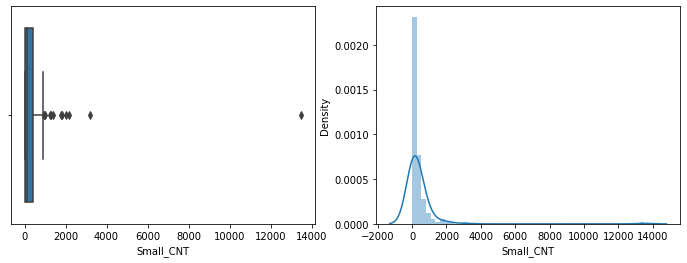

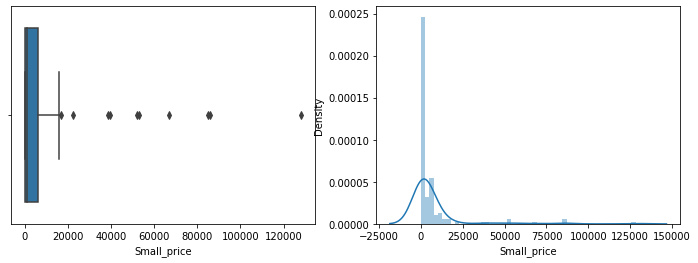

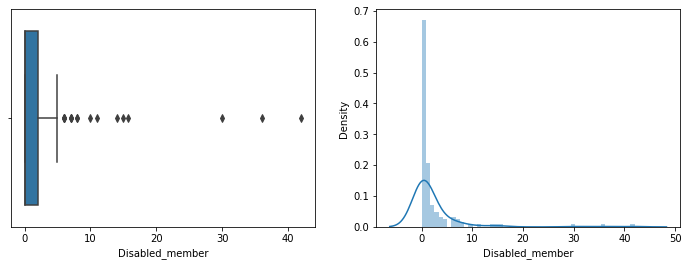

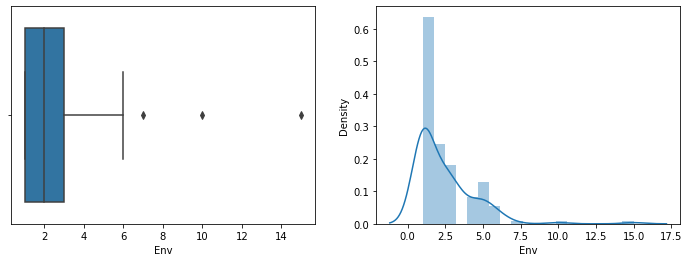

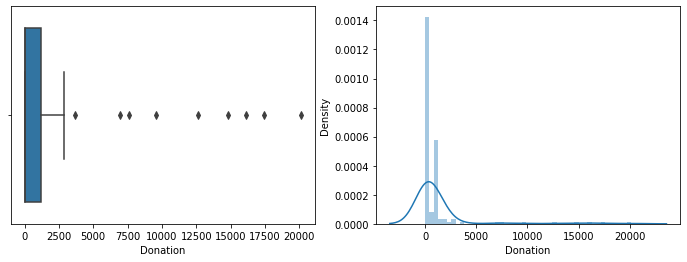

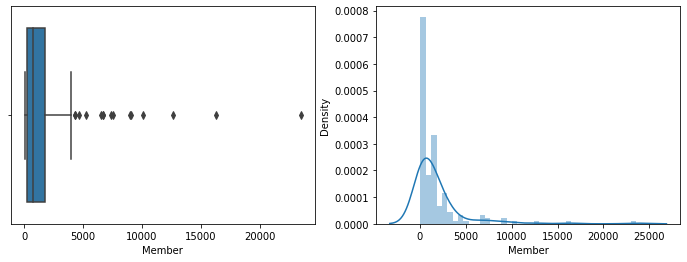

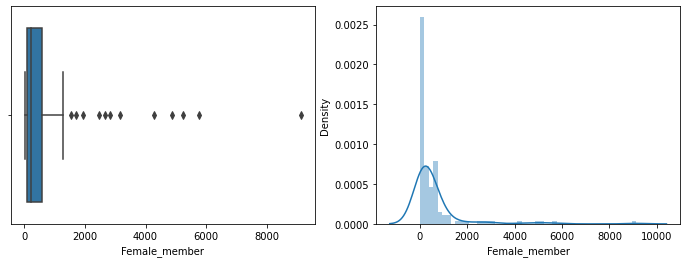

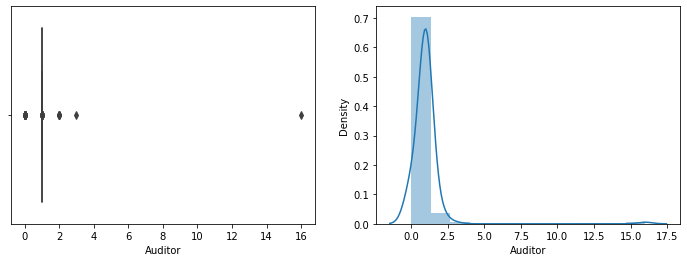

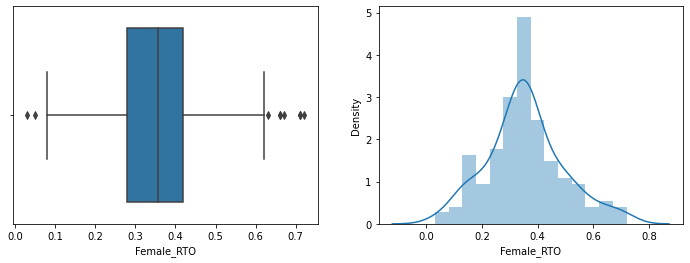

In [ ]:
# 시각화
columns = ['Green_CNT','Gas','Water','Energy','Waste','Green_price','Energy_price','Energy_CNT','Gas_reduce','Female_exe',
                'Disabled_Product_RTO','Small_CNT','Small_price','Disabled_member','Env','Donation','Member','Female_member','Auditor','Female_RTO']
show_hist(data,columns)

In [ ]:
# EDA에서 확인한 이상치 치환
data = cut_outlier(data, ['Waste', 'Energy'])

### **상관관계 확인**

In [ ]:
# 상관관계 분석(전체 데이터)
corr_data = round(data.corr(),2)
corr_data

,Green_CNT,Gas,Water,Energy,Waste,Green_price,Energy_price,Energy_CNT,Gas_reduce,Female_exe,Disabled_Product_RTO,Small_CNT,Small_price,Disabled_member,Env,Donation,Member,Female_member,Auditor,Female_RTO,Target
Green_CNT,1.00,0.07,0.03,0.14,0.11,0.79,0.85,0.98,-0.05,0.02,-0.05,0.91,0.72,0.09,-0.00,0.05,0.14,0.10,-0.02,-0.02,0.39
Gas,0.07,1.00,0.08,0.13,0.11,0.06,0.16,0.06,-0.13,0.07,-0.06,0.08,0.17,-0.04,0.07,-0.02,0.05,0.13,0.05,0.07,0.04
Water,0.03,0.08,1.00,0.48,0.40,0.07,0.07,0.02,-0.00,-0.13,-0.06,-0.01,0.08,0.09,0.07,0.03,0.08,0.04,-0.03,-0.13,0.12
Energy,0.14,0.13,0.48,1.00,0.68,0.28,0.22,0.07,-0.20,-0.12,-0.08,0.08,0.28,0.26,0.16,0.27,0.41,0.32,-0.12,-0.22,0.35
Waste,0.11,0.11,0.40,0.68,1.00,0.25,0.20,0.06,-0.11,-0.09,-0.07,0.07,0.28,0.21,0.17,0.25,0.25,0.13,-0.15,-0.22,0.31
Green_price,0.79,0.06,0.07,0.28,0.25,1.00,0.86,0.69,-0.03,0.01,-0.08,0.64,0.97,0.13,0.12,0.25,0.28,0.20,-0.06,-0.06,0.77
Energy_price,0.85,0.16,0.07,0.22,0.20,0.86,1.00,0.80,-0.05,-0.01,-0.07,0.65,0.84,0.08,0.09,0.12,0.21,0.17,-0.04,-0.02,0.64
Energy_CNT,0.98,0.06,0.02,0.07,0.06,0.69,0.80,1.00,-0.04,0.03,-0.03,0.92,0.62,-0.00,-0.04,0.02,0.04,0.03,-0.01,0.01,0.28
Gas_reduce,-0.05,-0.13,-0.00,-0.20,-0.11,-0.03,-0.05,-0.04,1.00,0.14,0.16,-0.05,-0.04,0.03,0.03,0.03,-0.03,-0.02,0.06,0.16,-0.02
Female_exe,0.02,0.07,-0.13,-0.12,-0.09,0.01,-0.01,0.03,0.14,1.00,0.08,0.07,-0.01,0.03,0.09,0.01,-0.06,-0.04,0.07,0.23,0.01


In [ ]:
# p-value
corr_p = corr(data, 1)

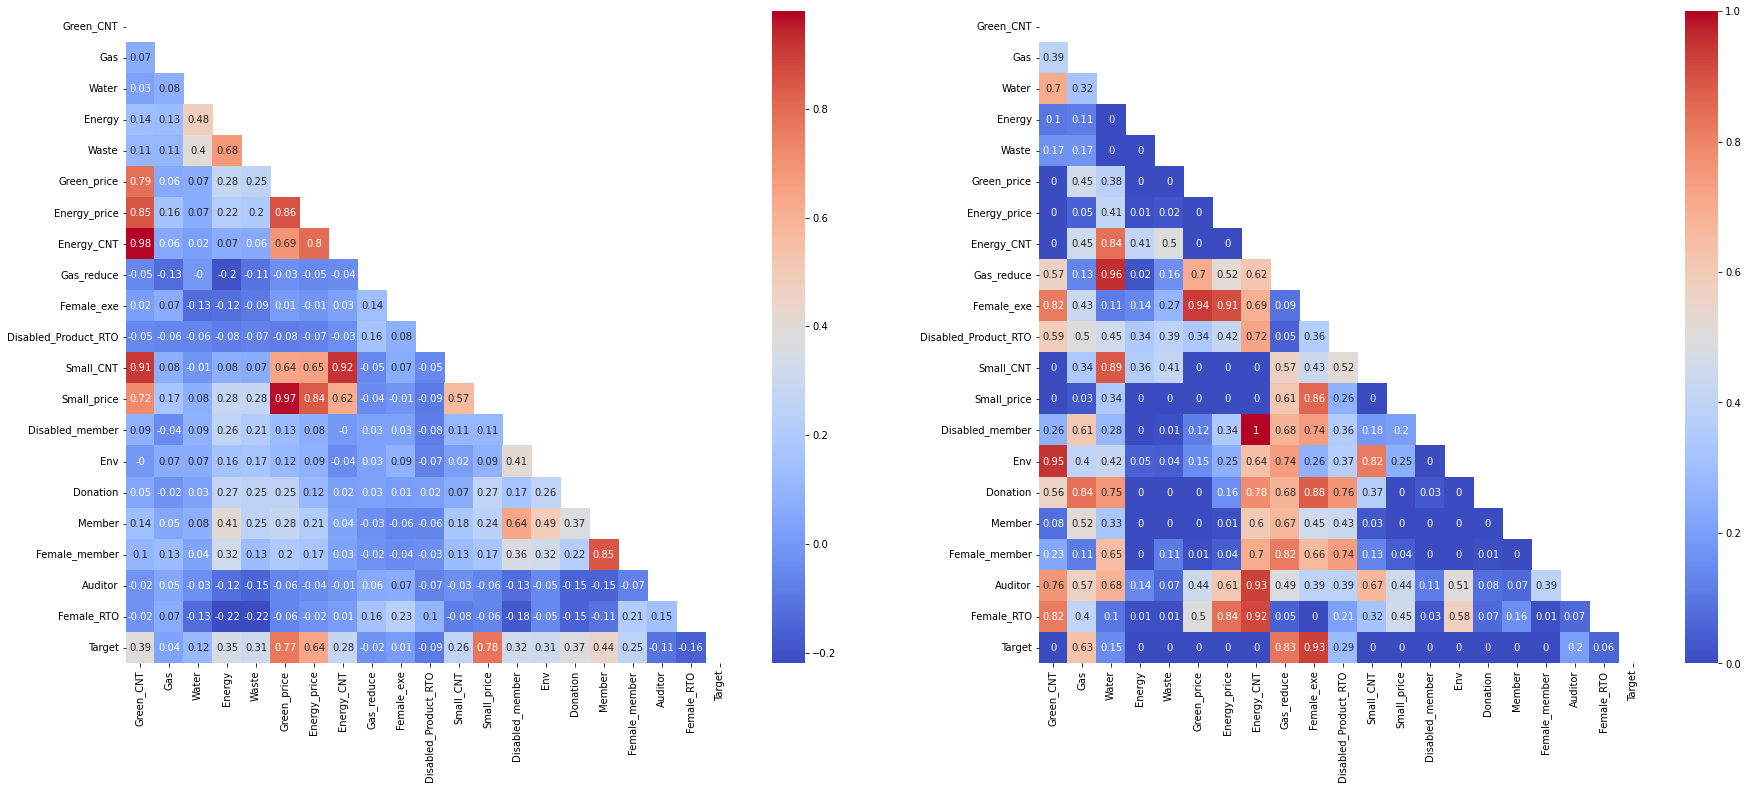

In [ ]:
# 시각화
show_heatmap(corr_data, corr_p, 30,12)

### **OLS**

In [ ]:
corr_filtered_column = ['Green_CNT', 'Green_price', 'Energy_price','Energy_CNT','Small_CNT','Small_price','Disabled_member','Member','Female_member']

In [ ]:
# OLS 회귀분석1
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

y_data = data['Target']
X_data = data[corr_filtered_column]

ols_model = sm.OLS(y_data, X_data)
ols_result = ols_model.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              118.2
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                    7.10e-61
Time:                        02:20:38   Log-Likelihood:                         -2128.1
No. Observations:                 149   AIC:                                      4274.
Df Residuals:                     140   BIC:                                      4301.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Green_CNT       -1149.8964    135.876     -8.463      0.000   -1418.530    -881.263
Green_price       128.4907     15.084      8.518      0.000      98.669     158.312
Energy_price       83.9851     25.329      3.316      0.001      33.908     134.063
Energy_CNT       1073.3152    214.201      5.011      0.000     649.829    1496.801
Small_CNT           2.1121    100.825      0.021      0.983    -197.224     201.448
Small_price        -0.3530      8.672     -0.041      0.968     -17.499      16.793
Disabled_member  3.473e+04   8882.000      3.910      0.000    1.72e+04    5.23e+04
Member            134.7462     30.086      4.479      0.000      75.265     194.227
Female_member    -263.0232     59.935     -4.388      0.000    -381.519    -144.528
==============================================================================
Omnibus:                       81.979   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              990.721
Skew:                           1.607   Prob(JB):                    7.37e-216
Kurtosis:                      15.217   Cond. No.                     5.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
ols_filtered_column = ['Member','Female_member','Green_CNT','Green_price','Disabled_member','Energy_CNT','Energy_price']

In [ ]:
# OLS 회귀분석2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

y_data = data['Target']
X_data = data[ols_filtered_column]

ols_model = sm.OLS(y_data, X_data)
ols_result = ols_model.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              154.1
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                    4.60e-63
Time:                        02:22:32   Log-Likelihood:                         -2128.1
No. Observations:                 149   AIC:                                      4270.
Df Residuals:                     142   BIC:                                      4291.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Member            135.0454     27.892      4.842      0.000      79.909     190.182
Female_member    -263.1831     59.159     -4.449      0.000    -380.129    -146.237
Green_CNT       -1149.6390    134.646     -8.538      0.000   -1415.808    -883.470
Green_price       128.0171      8.589     14.904      0.000     111.038     144.997
Disabled_member  3.472e+04   8809.902      3.941      0.000    1.73e+04    5.21e+04
Energy_CNT       1075.9797    187.613      5.735      0.000     705.104    1446.855
Energy_price       83.4229     18.271      4.566      0.000      47.304     119.542
==============================================================================
Omnibus:                       82.414   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              996.144
Skew:                           1.619   Prob(JB):                    4.90e-217
Kurtosis:                      15.246   Cond. No.                     3.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **QQ PLOT**

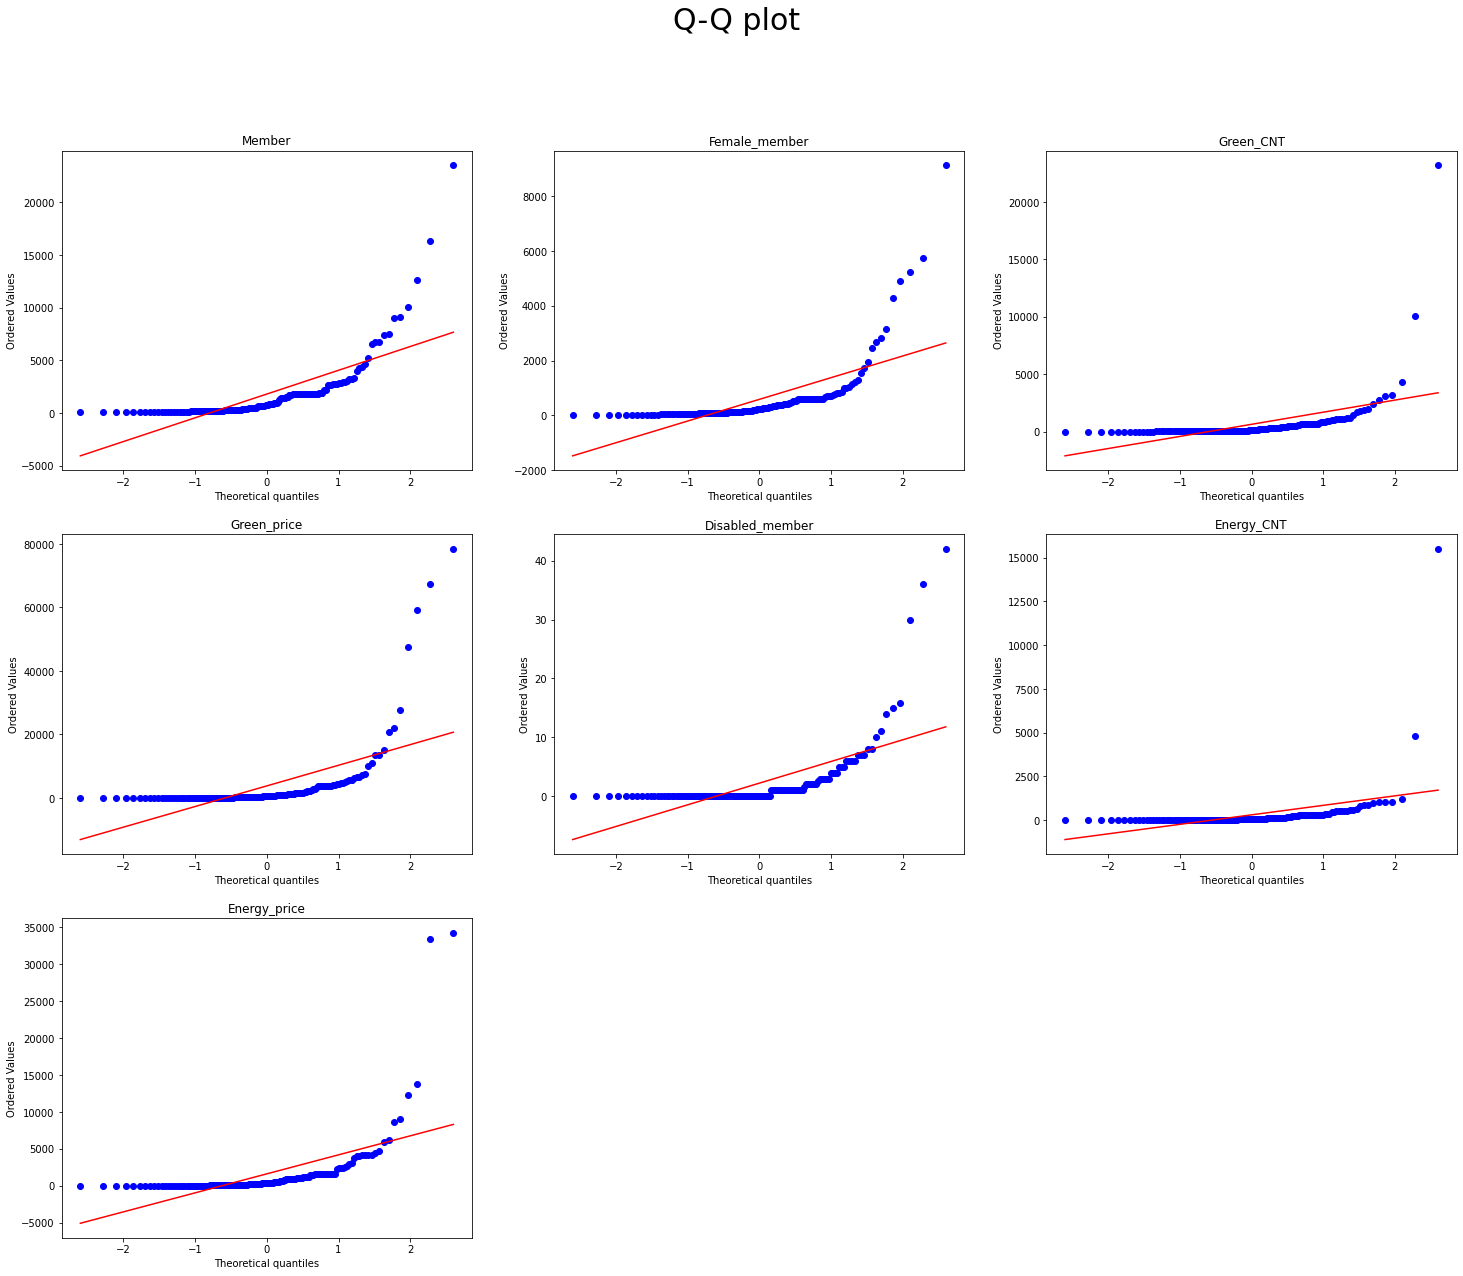

In [ ]:
# 의미있는 컬럼만 qqplot 확인
show_qqplot(ols_filtered_column)

### **TreeRegressor**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

y_data = data['Target']
X_data = data[ols_filtered_column]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=2022)

dt_rg = DecisionTreeRegressor(random_state=2022)
rf_rg = RandomForestRegressor(n_estimators=100, random_state=2022)

dt_rg.fit(X_train, y_train)
rf_rg.fit(X_train, y_train)

dt_pred = dt_rg.predict(X_test)
rf_pred = rf_rg.predict(X_test)

print('DT_r2_score : {0:.3f}'.format(r2_score(y_test,dt_pred)))
print('RF_r2_score : {0:.3f}'.format(r2_score(y_test,rf_pred)))

DT_r2_score : 0.864
RF_r2_score : 0.693


Member             0.057162
Female_member      0.067227
Green_CNT          0.081897
Green_price        0.590665
Disabled_member    0.017579
Energy_CNT         0.041763
Energy_price       0.143706
dtype: float64


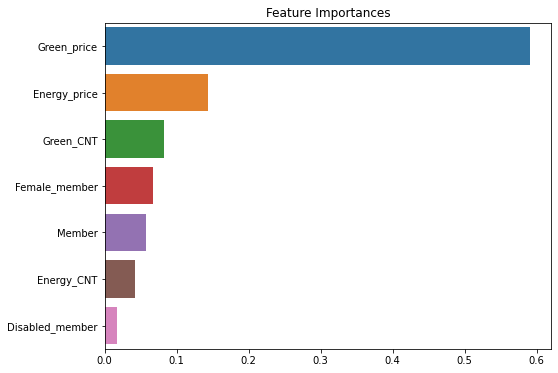

In [ ]:
# Feature Importance
ftr_importances = pd.Series(rf_rg.feature_importances_,index=X_train.columns)
print(ftr_importances)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

### **기업 순위 구하기**

In [ ]:
# 가중치 정의
new_column = ols_filtered_column.copy()
new_column.append('Target')
rank_data = data[new_column]
corr_rank_data = corr(rank_data, 0)

weight = calculate_weight(corr_rank_data.iloc[:7,-1])

In [ ]:
corr_rank_data

,Member,Female_member,Green_CNT,Green_price,Disabled_member,Energy_CNT,Energy_price,Target
Member,1.00,0.85,0.14,0.28,0.64,0.04,0.21,0.142395
Female_member,0.85,1.00,0.10,0.20,0.36,0.03,0.17,0.080906
Green_CNT,0.14,0.10,1.00,0.79,0.09,0.98,0.85,0.126214
Green_price,0.28,0.20,0.79,1.00,0.13,0.69,0.86,0.249191
Disabled_member,0.64,0.36,0.09,0.13,1.00,-0.00,0.08,0.103560
Energy_CNT,0.04,0.03,0.98,0.69,-0.00,1.00,0.80,0.090615
Energy_price,0.21,0.17,0.85,0.86,0.08,0.80,1.00,0.207120
Target,0.44,0.25,0.39,0.77,0.32,0.28,0.64,1.000000


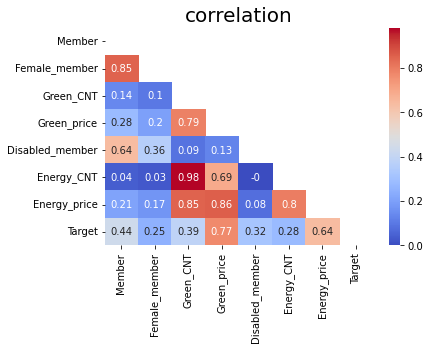

In [ ]:
# 상관관계 시각화
mask = np.zeros_like(corr_rank_data)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(corr_rank_data, annot=True, mask = mask, cmap='coolwarm')
plt.title('correlation', fontsize=20)
plt.show()

In [ ]:
rank_data['Metrics'] = 0
for i in range(len(rank_data)):
   metrics = rank_data.iloc[i,:7] * weight
   rank_data.iloc[i,-1] = metrics.sum()

In [ ]:
rank_data.sort_values('Metrics', ascending=False, inplace=True)

In [ ]:
rank_data.head(20)

,Member,Female_member,Green_CNT,Green_price,Disabled_member,Energy_CNT,Energy_price,Target,Metrics
공공기관,,,,,,,,,
국방부,42.000000,22.00,10103.0,78462.013104,0.00,4813.0,34256.382091,6.554163e+06,28366.221562
교육부,1795.863233,585.22,23225.0,67454.152563,0.00,15508.0,33335.300437,1.502818e+06,28352.998245
한국토지주택공사,8979.000000,3156.26,2439.0,59269.556836,0.00,871.0,9073.049603,6.864351e+06,18569.328644
한국농어촌공사,6708.000000,1539.75,4312.0,47621.615002,1.00,969.0,3009.051123,3.067110e+06,14202.010929
한국수자원공사,6508.000000,1284.63,2723.0,27774.776024,36.00,475.0,3769.567226,1.926139e+06,9123.064098
한국전력공사,23540.000000,5218.13,1167.0,13420.981467,42.00,221.0,8580.872314,5.891993e+06,9067.474599
국토교통부,930.700000,148.70,1113.0,20712.511005,0.00,589.0,13826.388083,4.157385e+06,8363.493478
한국환경공단,3239.000000,1011.98,3153.0,22018.636621,11.00,1027.0,2412.375257,9.760878e+05,7021.739599
국민건강보험공단,16326.000000,9130.00,1481.0,10036.953572,1.00,305.0,5934.461979,2.105010e+05,7008.336543


In [ ]:
rank_data.to_csv('/content/drive/MyDrive/Contest/공공조달/dataset/rank_data.csv', encoding='utf-8-sig')